In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [154]:
df = pd.read_csv('weight-height.csv')

# One hot encoding a nominal feature -> 'Gender'
ohe = OneHotEncoder(sparse = False)

arr = ohe.fit_transform(df.Gender.values.reshape(-1, 1)) # Returns array of encoded feature

new_features_name = ohe.categories_[0].tolist() # i.e. 'Female' and 'Male'

df_encoded = pd.DataFrame(data = arr, columns = new_features_name)

# Adding 'Height' and 'Weight' columns to this new dataframe
df_encoded[['Height', 'Weight']] = df.iloc[:, 1:3]
df_encoded.head()

,Female,Male,Height,Weight
0,0.0,1.0,73.847017,241.893563
1,0.0,1.0,68.781904,162.310473
2,0.0,1.0,74.110105,212.740856
3,0.0,1.0,71.730978,220.042470
4,0.0,1.0,69.881796,206.349801


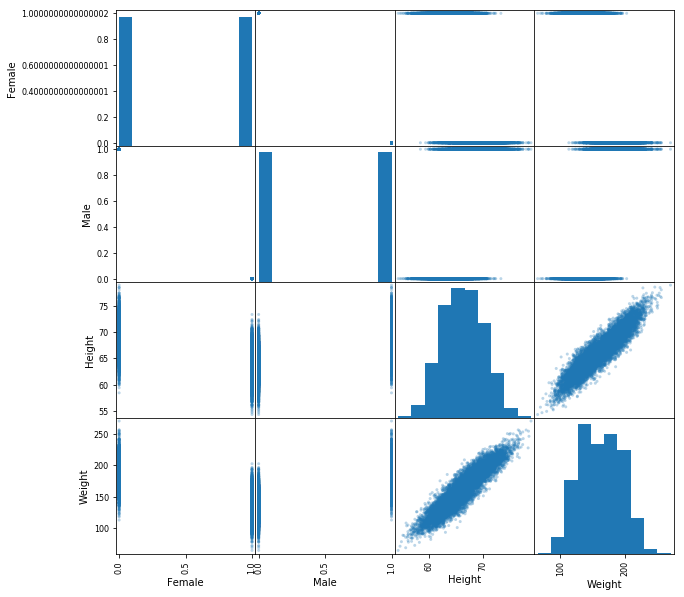

In [155]:
# Analysing relation between every pair of feature
pd.plotting.scatter_matrix(df_encoded, alpha = 0.3, figsize=(10, 10))
plt.show()

In [156]:
#splitting dataset into 80% training and 20% testing dataset
df_encoded_train, df_encoded_test = train_test_split(df_encoded, test_size = 0.2)

In [160]:
lr = LinearRegression()

features_train = df_encoded_train.drop(columns = 'Weight')
target_train = df_encoded_train.Weight

features_test = df_encoded_test.drop(columns = 'Weight')
target_test = df_encoded_test.Weight

lr.fit(features_train, target_train)
coefficients = lr.coef_

print(f'Coefficient of Female is {coefficients[0]}')
print(f'Coefficient of Male is {coefficients[1]}')
print(f'Coefficient of Height is {coefficients[2]}')

Coefficient of Female is -9.704851632364107
Coefficient of Male is 9.704851632364095
Coefficient of Height is 5.951251412246652


In [164]:
y_pred = lr.predict(features_test)

# R2 Score
score = r2_score(target_test, y_pred)
print('R2 score of this model is ', score)

R2 score of this model is  0.908698419973573


In [163]:
# Mean Absolute Error
mae = mean_absolute_error(target_test, y_pred)
print('Mean Absolte Error of this model is ', mae)

Mean Absolte Error of this model is  7.880262332088507
